#### Notebook for sub-clustering myeloid cells from *GSE173468* to then overlay my mregDC sig.

In [1]:
#set wd
getwd()
setwd('/scratch/user/s4436039/scdata/GSE173468')
getwd()

[1] "/scratch/user/s4436039/Nikita-project"

[1] "/scratch/user/s4436039/scdata/GSE173468"

In [2]:
#Load packages
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [3]:
#Load in previously exported myeloid cells
myeloid_HNSCC <- readRDS("/scratch/user/s4436039/scdata/GSE173468/GSE173468_myeloid.RDS")

In [4]:
myeloid_HNSCC
head(myeloid_HNSCC)
tail(myeloid_HNSCC)

An object of class Seurat 
36601 features across 4434 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 37 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, counts.6, counts.7, counts.8, counts.9, counts.10, counts.11, counts.12, counts.13, counts.14, counts.15, counts.16, counts.17, counts.18, data.1, data.2, data.3, data.4, data.5, data.6, data.7, data.8, data.9, data.10, data.11, data.12, data.13, data.14, data.15, data.16, data.17, data.18, scale.data
 2 dimensional reductions calculated: pca, umap

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,RNA_snn_res.0.2,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>
GSE173468_N3_AAATGCCTCATAACCG-1,GSE173468,3796,1228,Healthy,Healthy,N3,GSE173468_Healthy_N3,4.3730242,5,5
GSE173468_N3_AACTGGTCAGCTGGCT-1,GSE173468,871,425,Healthy,Healthy,N3,GSE173468_Healthy_N3,1.1481056,5,5
GSE173468_N3_ACACCGGCAGCCTTTC-1,GSE173468,2879,1401,Healthy,Healthy,N3,GSE173468_Healthy_N3,0.2431400,5,5
GSE173468_N3_ACACTGACAAGGTTCT-1,GSE173468,16743,2870,Healthy,Healthy,N3,GSE173468_Healthy_N3,0.1851520,5,5
GSE173468_N3_AGAGTGGTCTGCAAGT-1,GSE173468,4944,1105,Healthy,Healthy,N3,GSE173468_Healthy_N3,0.2224919,5,5
GSE173468_N3_AGCTTGACAGGGTACA-1,GSE173468,615,357,Healthy,Healthy,N3,GSE173468_Healthy_N3,0.0000000,5,5
GSE173468_N3_AGCTTGAGTAGCGTCC-1,GSE173468,778,501,Healthy,Healthy,N3,GSE173468_Healthy_N3,2.8277635,5,5
GSE173468_N3_AGTTGGTGTTACAGAA-1,GSE173468,4721,1787,Healthy,Healthy,N3,GSE173468_Healthy_N3,2.4994705,5,5
GSE173468_N3_ATTGGACAGCCGGTAA-1,GSE173468,1890,600,Healthy,Healthy,N3,GSE173468_Healthy_N3,0.0000000,5,5


,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,RNA_snn_res.0.2,seurat_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>
GSE173468_T29Primary_TGTGTTTGTGGCGAAT-1,GSE173468,6334,2245,tumour,HNSCC,T29Prim,GSE173468_HNSCC_Prim_T29,7.309757,5,5
GSE173468_T29Primary_TTAACTCAGGAATCGC-1,GSE173468,12521,3137,tumour,HNSCC,T29Prim,GSE173468_HNSCC_Prim_T29,5.486782,5,5
GSE173468_T29Primary_TTATGCTTCCCAGGTG-1,GSE173468,6855,2344,tumour,HNSCC,T29Prim,GSE173468_HNSCC_Prim_T29,6.739606,5,5
GSE173468_T29Primary_TTCGGTCTCTATCCTA-1,GSE173468,7325,2024,tumour,HNSCC,T29Prim,GSE173468_HNSCC_Prim_T29,5.269625,5,5
GSE173468_T29Primary_TTCTCCTCATGTCCTC-1,GSE173468,40624,6613,tumour,HNSCC,T29Prim,GSE173468_HNSCC_Prim_T29,5.787219,5,5
GSE173468_T29Primary_TTGAACGTCCGCGTTT-1,GSE173468,19144,3547,tumour,HNSCC,T29Prim,GSE173468_HNSCC_Prim_T29,5.907856,5,5
GSE173468_T29Primary_TTGACTTAGGCTCTTA-1,GSE173468,18532,3444,tumour,HNSCC,T29Prim,GSE173468_HNSCC_Prim_T29,3.663933,5,5
GSE173468_T29Primary_TTGCGTCGTACACCGC-1,GSE173468,1904,1013,tumour,HNSCC,T29Prim,GSE173468_HNSCC_Prim_T29,2.573529,5,5
GSE173468_T29Primary_TTTCCTCAGAATCTCC-1,GSE173468,8687,1978,tumour,HNSCC,T29Prim,GSE173468_HNSCC_Prim_T29,4.535513,5,5


#### Subclustering data
* should I change the number of variable features or anything when doing the subclustering?

In [5]:
#Find variable features
myeloid_HNSCC <- FindVariableFeatures(myeloid_HNSCC, selection.method = "vst", nfeatures = 2000)

Finding variable features for layer counts.1

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.7899”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.32004”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 0.031008”
Finding variable features for layer counts.2

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -1.6228”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 0.32176”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”
Warning message in simpleLoess(y,

In [6]:
#Scale the data
myeloid_HNSCC <- ScaleData(myeloid_HNSCC, vars.to.regress = c("percent.mt", "nCount_RNA"))
#Run pca
myeloid_HNSCC <- RunPCA(myeloid_HNSCC, features = VariableFeatures(object = myeloid_HNSCC))

Regressing out percent.mt, nCount_RNA

Centering and scaling data matrix

Warning message:
“Different features in new layer data than already exists for scale.data”
PC_ 1 
Positive:  CTSL, SOD2, CTSB, APOE, FTL, PSAP, C5AR1, CTSD, PLD3, APOC1 
	   CD163, LGALS3, MMP19, CD68, LGMN, LHFPL2, GPNMB, CREG1, PDE4DIP, ASAH1 
	   A2M, FCGR3A, IER3, DAB2, SLCO2B1, LILRB4, CXCL2, RNASE1, PMP22, TFRC 
Negative:  ACTB, S100B, CD1A, LTB, PKIB, PPA1, NDRG2, CORO1A, TACSTD2, CST7 
	   FCER1A, ICAM3, LSP1, CD1E, CKLF, DAPP1, SLC38A1, CD207, PCLAF, CD1C 
	   TYMS, RPL35A, PLAC8, SUSD3, H2AFZ, IDO1, LMNB1, STMN1, TUBA1A, PLEK2 
PC_ 2 
Positive:  CST7, DUSP4, VIM, LGALS2, IDO1, TIMP1, LSP1, CYTIP, GPAT3, GPR157 
	   HLA-DQA1, MARCKSL1, PPA1, CFP, IFI30, RALA, HLA-DQB1, PKIB, IRF4, ADAM19 
	   RASSF5, CD1E, CCR7, C15orf48, RHOF, SLC7A11, ACTB, CD52, CALCRL, CRIP1 
Negative:  PERP, MIR205HG, S100A14, SFN, CDKN2A, KRT6A, CLDN4, KRT5, CALML3, S100A16 
	   KRT15, S100A2, KRT19, GJB3, MDK, SERPINB5, DSG3, FXYD

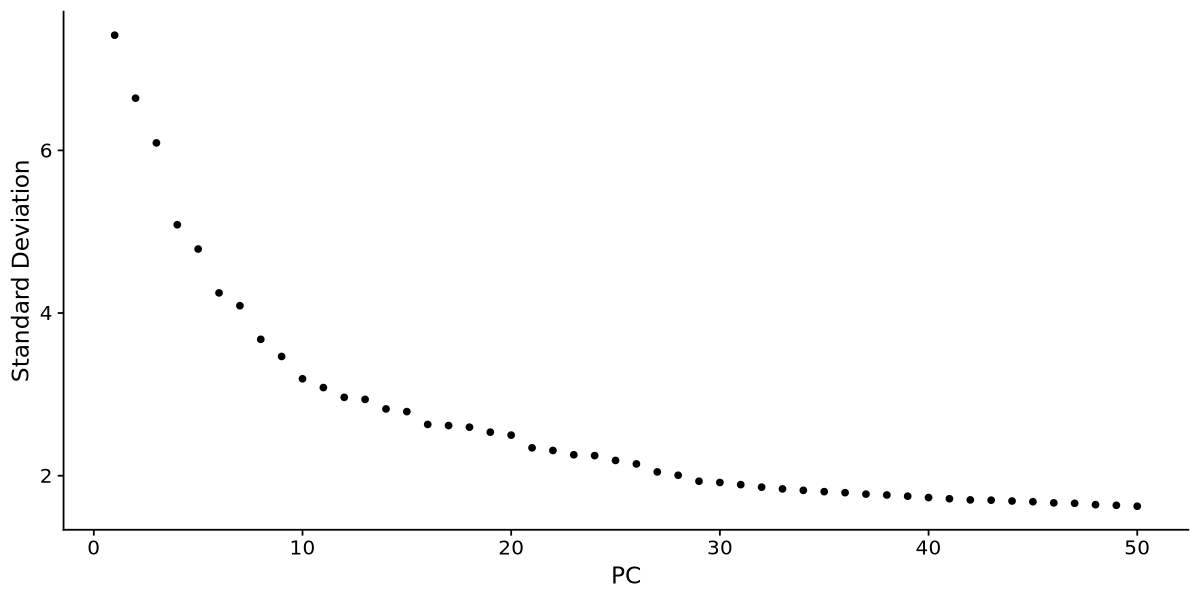

In [7]:
#make elbow plot
options(repr.plot.height=5, repr.plot.width=10)
ElbowPlot(myeloid_HNSCC, ndims=50)
#go with 40 again

In [8]:
#Find neighbours (make sure number matches no. features chosen above)
myeloid_HNSCC <- FindNeighbors(myeloid_HNSCC, dims = 1:40)

Computing nearest neighbor graph

Computing SNN



In [9]:
#Run UMAP
myeloid_HNSCC <- RunUMAP(myeloid_HNSCC, dims = 1:40)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:40:10 UMAP embedding parameters a = 0.9922 b = 1.112

09:40:10 Read 4434 rows and found 40 numeric columns

09:40:10 Using Annoy for neighbor search, n_neighbors = 30

09:40:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:40:10 Writing NN index file to temp file /scratch/temp/9234534/Rtmp2xK2OV/filea22d95c91bb18

09:40:10 Searching Annoy index using 1 thread, search_k = 3000

09:40:11 Annoy recall = 100%

09:40:11 Commencing smooth kNN distance calibration using 1 thread
 with ta

In [10]:
#Cluster, resolution here set to 0.5
myeloid_HNSCC <- FindClusters(myeloid_HNSCC, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4434
Number of edges: 160320

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8486
Number of communities: 12
Elapsed time: 0 seconds


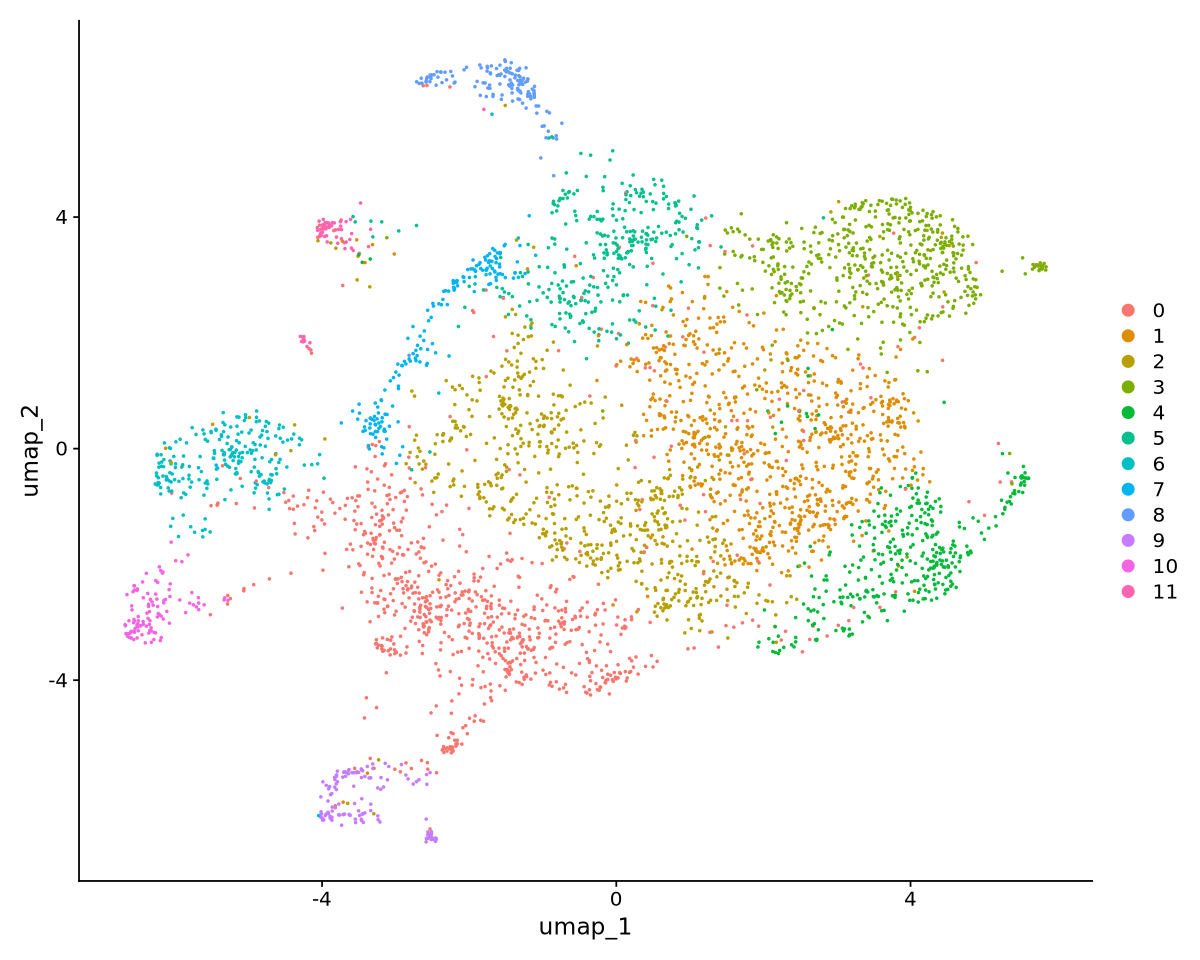

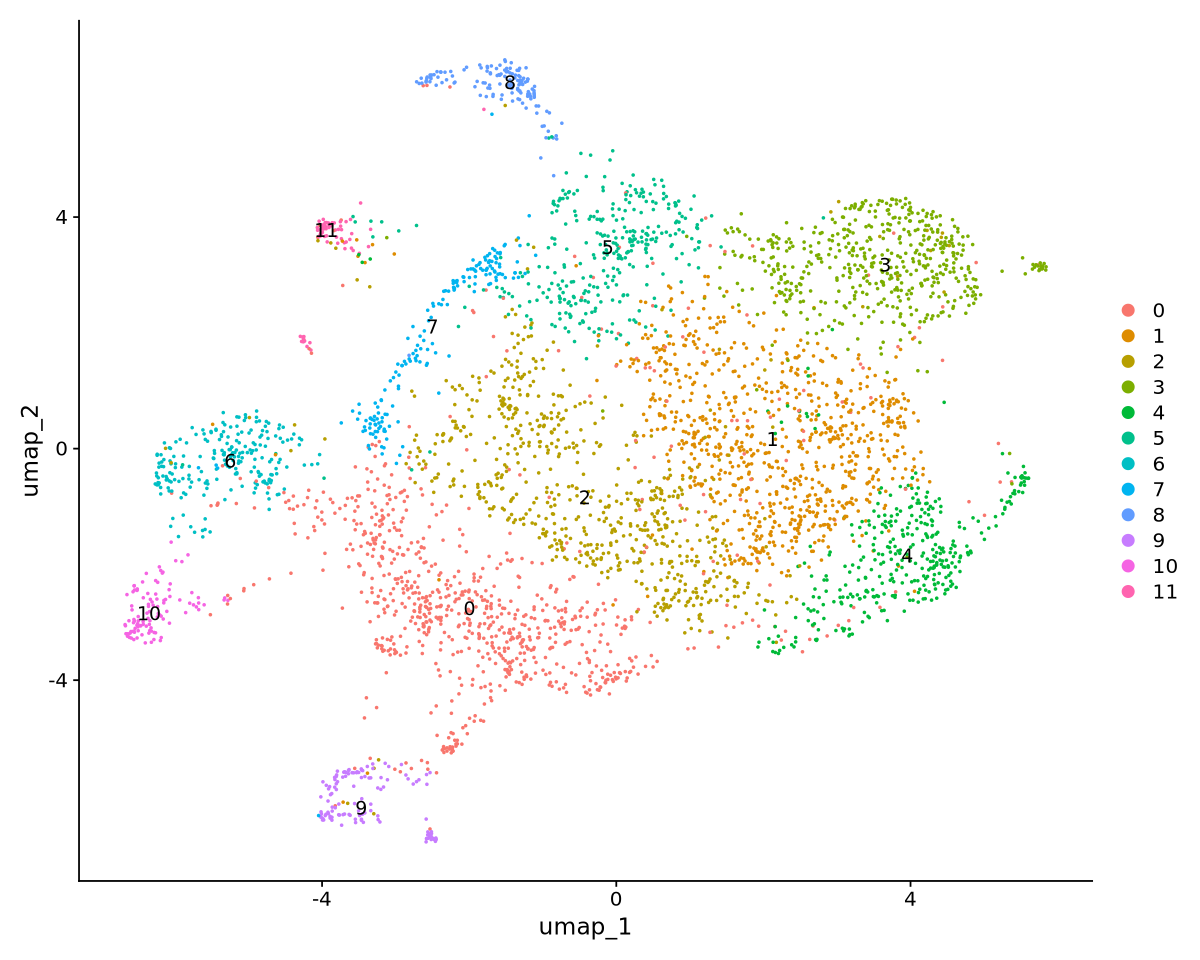

In [11]:
#Plot UMAP
options(repr.plot.height=8, repr.plot.width=10)
DimPlot(myeloid_HNSCC, reduction = "umap")
DimPlot(myeloid_HNSCC, reduction = "umap", label=TRUE)

In [12]:
#when I ran the line below it said I needed to join layers first, so doing that here.
myeloid_HNSCC <- JoinLayers(myeloid_HNSCC)

In [13]:
myeloid_HNSCC

An object of class Seurat 
36601 features across 4434 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 2 dimensional reductions calculated: pca, umap

In [14]:
library(devtools)
library(presto)

Loading required package: usethis

Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [15]:
# find markers for every cluster compared to all remaining cells
myeloid_HNSCC.markers <- FindAllMarkers(myeloid_HNSCC, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [16]:
#report only the positive ones
myeloid_HNSCC.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
8.326632e-30,1.020580,0.146,0.407,3.047631e-25,0,SNX2
1.088272e-24,1.009686,0.130,0.346,3.983185e-20,0,HNMT
4.012152e-22,1.091592,0.071,0.230,1.468488e-17,0,TTC1
8.720345e-22,1.133514,0.097,0.276,3.191734e-17,0,PPA2
1.312259e-21,1.059195,0.086,0.253,4.802997e-17,0,CCDC115
5.005350e-20,1.013970,0.048,0.180,1.832008e-15,0,C1orf21
6.099560e-20,1.247450,0.054,0.191,2.232500e-15,0,TPD52
8.863676e-20,1.071211,0.050,0.183,3.244194e-15,0,VPS25
9.397674e-20,1.039219,0.045,0.171,3.439642e-15,0,QDPR


In [17]:
#top 10 genes for each cluster
top10cluster <- myeloid_HNSCC.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10

#repeat for top 20
top20cluster <- myeloid_HNSCC.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 20) %>%
    ungroup() -> top20

In [18]:
top10cluster
write.csv(top10cluster,"GSE173468_myeloid_top10cluster.csv") 

top20cluster
write.csv(top20cluster,"GSE173468_myeloid_top20cluster.csv") 

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
8.326632e-30,1.020580,0.146,0.407,3.047631e-25,0,SNX2
1.088272e-24,1.009686,0.130,0.346,3.983185e-20,0,HNMT
4.012152e-22,1.091592,0.071,0.230,1.468488e-17,0,TTC1
8.720345e-22,1.133514,0.097,0.276,3.191734e-17,0,PPA2
1.312259e-21,1.059195,0.086,0.253,4.802997e-17,0,CCDC115
5.005350e-20,1.013970,0.048,0.180,1.832008e-15,0,C1orf21
6.099560e-20,1.247450,0.054,0.191,2.232500e-15,0,TPD52
8.863676e-20,1.071211,0.050,0.183,3.244194e-15,0,VPS25
9.397674e-20,1.039219,0.045,0.171,3.439642e-15,0,QDPR


p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
8.326632e-30,1.020580,0.146,0.407,3.047631e-25,0,SNX2
1.088272e-24,1.009686,0.130,0.346,3.983185e-20,0,HNMT
4.012152e-22,1.091592,0.071,0.230,1.468488e-17,0,TTC1
8.720345e-22,1.133514,0.097,0.276,3.191734e-17,0,PPA2
1.312259e-21,1.059195,0.086,0.253,4.802997e-17,0,CCDC115
5.005350e-20,1.013970,0.048,0.180,1.832008e-15,0,C1orf21
6.099560e-20,1.247450,0.054,0.191,2.232500e-15,0,TPD52
8.863676e-20,1.071211,0.050,0.183,3.244194e-15,0,VPS25
9.397674e-20,1.039219,0.045,0.171,3.439642e-15,0,QDPR


Warning message in DoHeatmap(myeloid_HNSCC, features = top10$gene):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: GZMM, TRAT1, ITM2A, FBXO27, PPY, SNX22, ABCA1, TTYH3, CD81, QDPR, VPS25, TPD52, C1orf21, CCDC115, PPA2, TTC1, HNMT, SNX2”


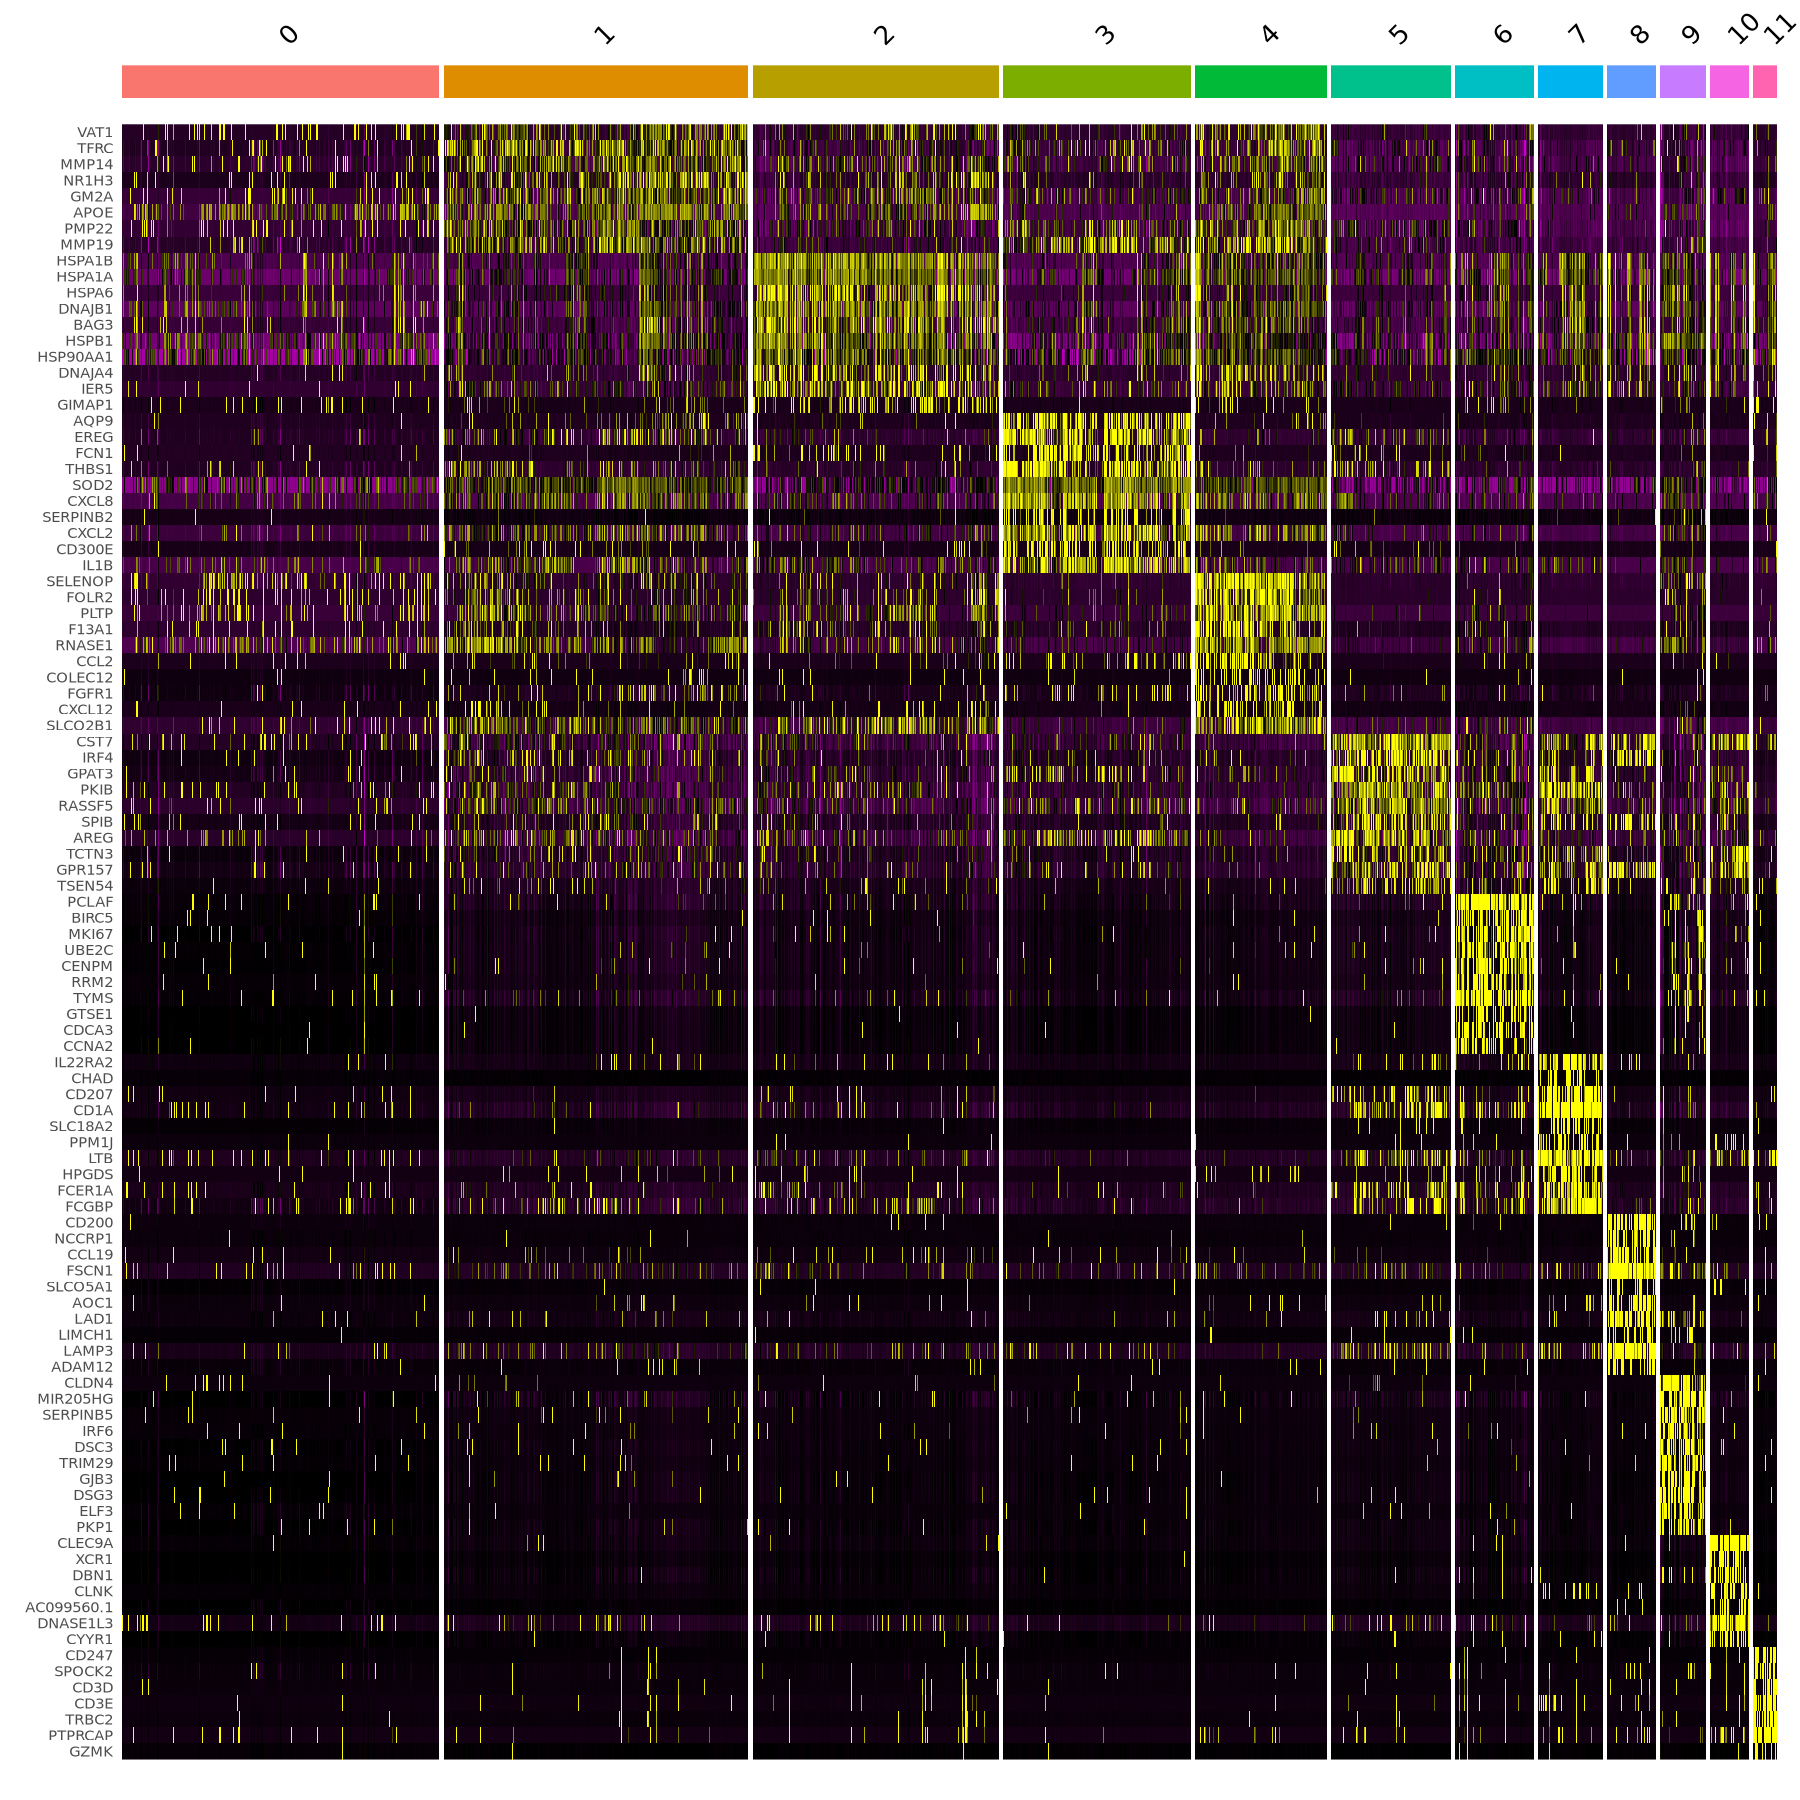

In [19]:
options(repr.plot.height=15, repr.plot.width=15)
myeloid_HNSCC.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10
DoHeatmap(myeloid_HNSCC, features = top10$gene) + NoLegend()

#### Next annotate cell clusters based on top 20 genes (done manually looking at csv exported above, see i drive for notes)

In [20]:
##add annotation code here

#### using seurat AddModuleScore to see where my mregDC signature is enriched

In [21]:
#make an object with my top 100 DEGs (ag_pos vs Dll1 limma)

sig <- list(c(
  'CCL22',
  'IL4I1',
  'SIRPA',
  'CCR7',
  'CHST11',
  'GPR157',
  'RGS1',
  'BIRC3',
  'TRAF1',
  'CSF2RA',
  'TBC1D13',
  'LAMP3',
  'MREG',
  'PPP1R14A',
  'SPRED2',
  'CD83',
  'TXN',
  'MOB3A',
  'NFKB1',
  'TBC1D4',
  'CDK2',
  'WFDC21P',
  'ARAP2',
  'ZER1',
  'ACSL1',
  'SPINT2',
  'SQSTM1',
  'TBC1D8',
  'JAG1',
  'AC073508.3',
  'BATF',
  'ETV3',
  'BCL2',
  'KIF2A',
  'FSCN1',
  'TNFAIP3',
  'CCDC28B',
  'NR4A3',
  'CYTIP',
  'PLEK',
  'FOXO1',
  'TOMM34',
  'TRAFD1',
  'PPP1R16B',
  'CXCR4',
  'CD40',
  'ENTPD7',
  'CDKN1A',
  'BID',
  'MARCKS',
  'DUSP5',
  'MAP4K4',
  'BCL2L1',
  'ISG20',
  'RNF145',
  'RNF121',
  'GPR132',
  'RASGEF1B',
  'CYRIA',
  'RAB10',
  'CERS6',
  'IL1R1',
  'STK4',
  'CLEC2D',
  'AL390719.1',
  'ZBTB38',
  'IFNGR2',
  'CD274',
  'SLC41A2',
  'NRP2',
  'ANKRD33B',
  'GPR183',
  'POGLUT1',
  'ADORA2A',
  'JADE3',
  'KHDRBS3',
  'CTNNB1',
  'SLCO5A1',
  'NFKB2',
  'RGS2',
  'SEC61B',
  'ZNRF1',
  'RELB',
  'C12orf45',
  'IRF2',
  'EPOP',
  'MXD1',
  'RAB5B',
  'PADI2',
  'DRAM1',
  'MTMR4',
  'EEF2K',
  'GCNT2',
  'RAPH1',
  'BCL2A1',
  'SEC23B',
  'PIM3',
  'ANTXR2',
  'ABTB2',
  'TMEM200A'
))

In [23]:
#calculate module score
myeloid_HNSCC <- AddModuleScore(
  object = myeloid_HNSCC,
  features = sig,
  name = "Sig_enriched"
)

Warning message:
“The following features are not present in the object: WFDC21P, CYRIA, AL390719.1, not searching for symbol synonyms”


In [26]:
head(myeloid_HNSCC@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_type,cancer_type,patient_id,sample_id,percent.mt,RNA_snn_res.0.2,seurat_clusters,RNA_snn_res.0.5,Sig_enriched1
,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<dbl>
GSE173468_N3_AAATGCCTCATAACCG-1,GSE173468,3796,1228,Healthy,Healthy,N3,GSE173468_Healthy_N3,4.3730242,5,2,2,-0.03978925
GSE173468_N3_AACTGGTCAGCTGGCT-1,GSE173468,871,425,Healthy,Healthy,N3,GSE173468_Healthy_N3,1.1481056,5,0,0,-0.12815296
GSE173468_N3_ACACCGGCAGCCTTTC-1,GSE173468,2879,1401,Healthy,Healthy,N3,GSE173468_Healthy_N3,0.2431400,5,4,4,0.02988284
GSE173468_N3_ACACTGACAAGGTTCT-1,GSE173468,16743,2870,Healthy,Healthy,N3,GSE173468_Healthy_N3,0.1851520,5,2,2,-0.04089166
GSE173468_N3_AGAGTGGTCTGCAAGT-1,GSE173468,4944,1105,Healthy,Healthy,N3,GSE173468_Healthy_N3,0.2224919,5,0,0,-0.11581694
GSE173468_N3_AGCTTGACAGGGTACA-1,GSE173468,615,357,Healthy,Healthy,N3,GSE173468_Healthy_N3,0.0000000,5,0,0,-0.13481562


In [29]:
library(ggplot2)
library(RColorBrewer)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


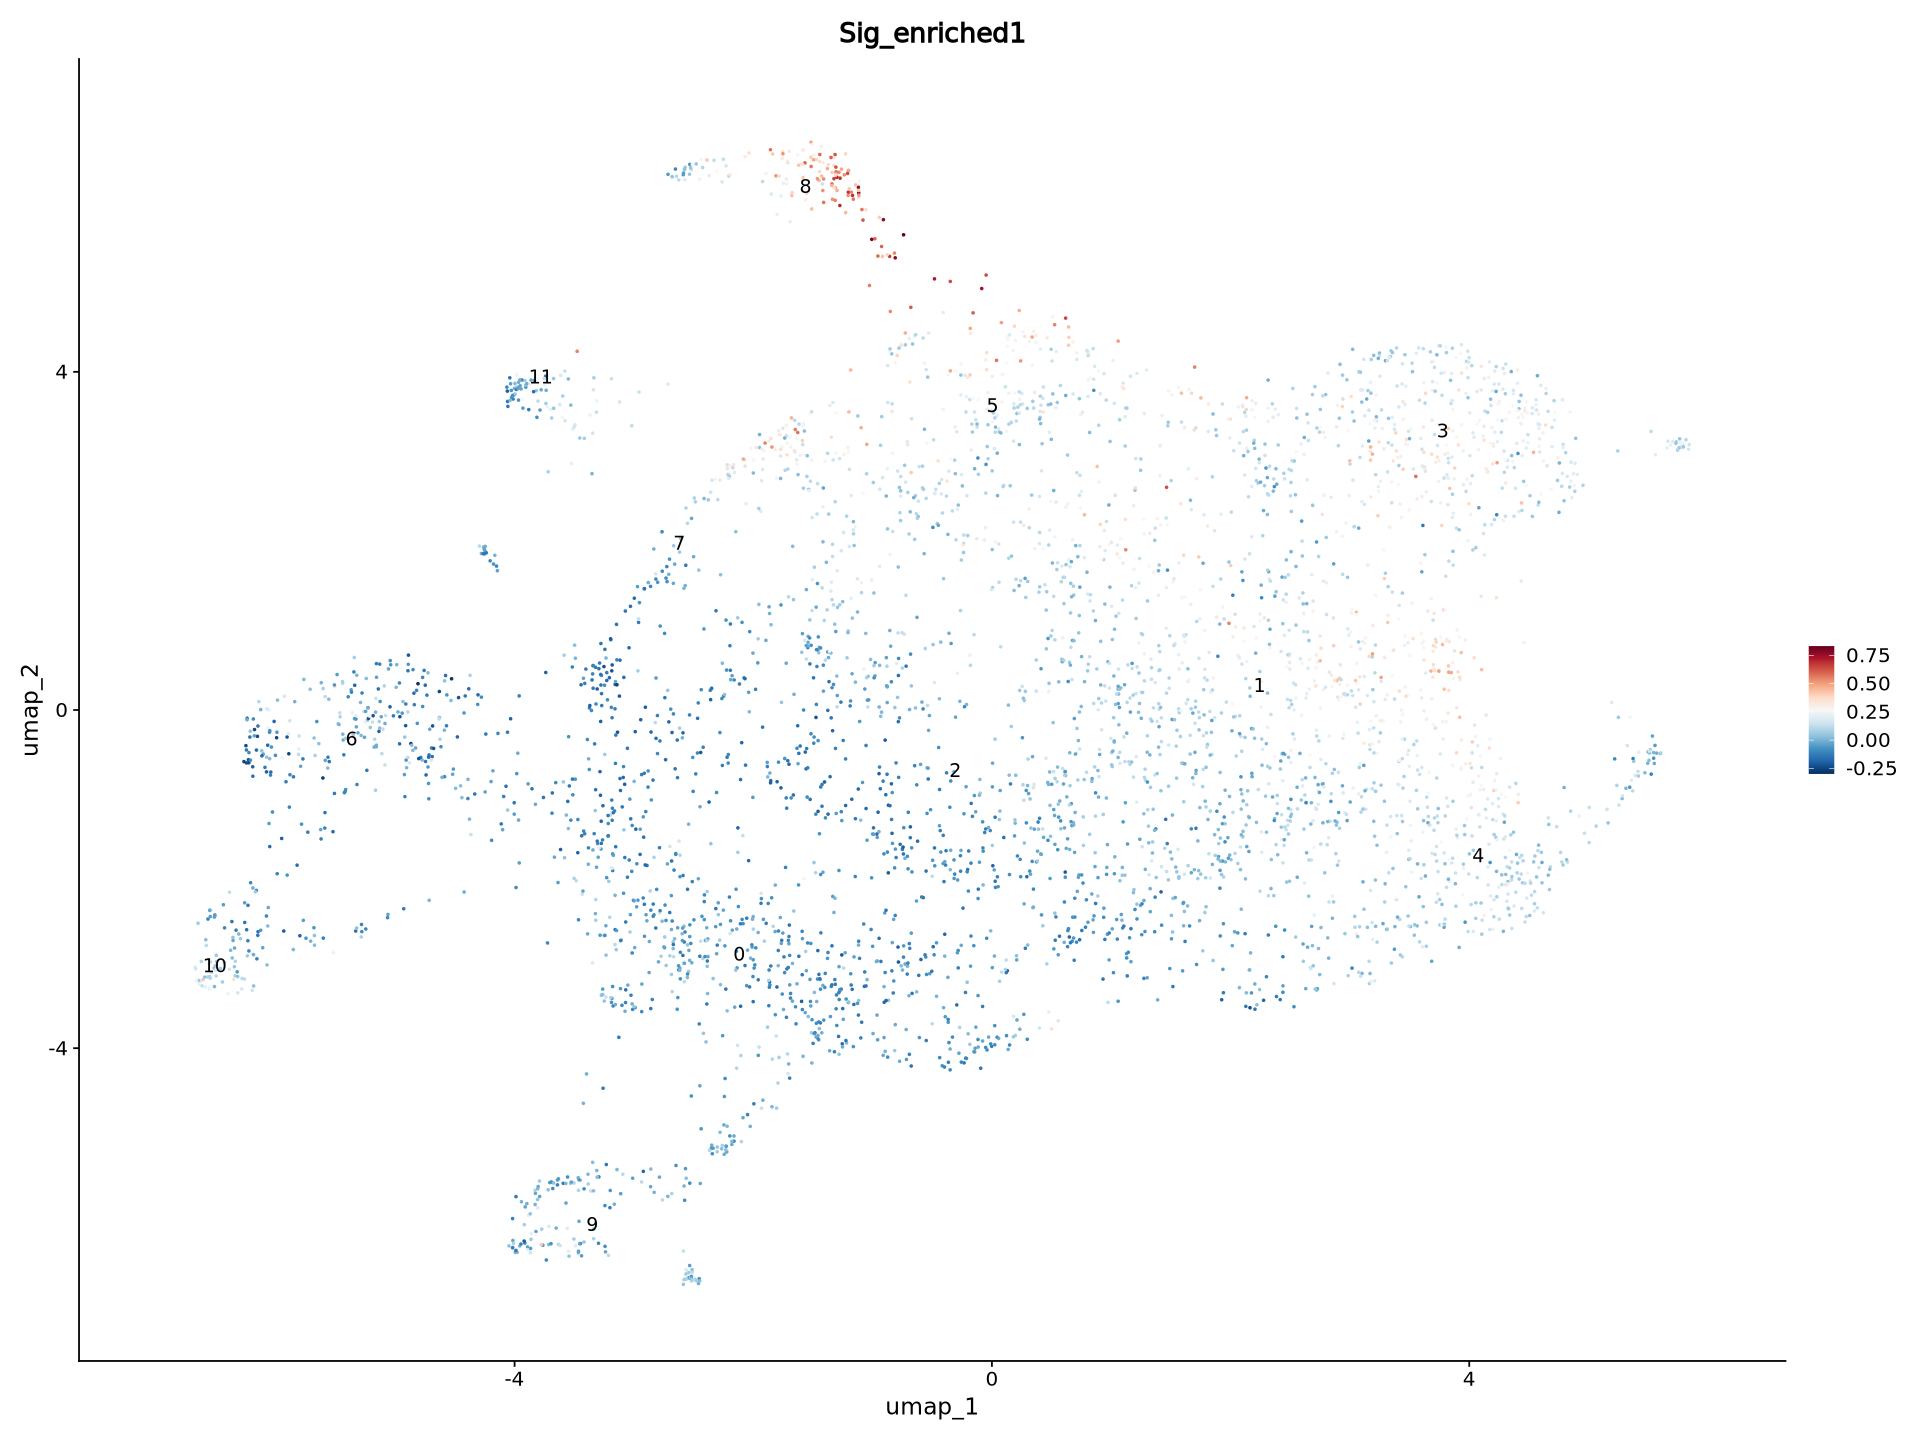

In [32]:
#Plot UMAP with module score
options(repr.plot.height=12, repr.plot.width=16)

FeaturePlot(myeloid_HNSCC,
            features = "Sig_enriched1", label = TRUE, repel = TRUE) +
            scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu")))

#### Repeating with AUCell

In [37]:
library(AUCell)

In [38]:
#calculate rankings for each cell
cells_rankings <- AUCell.buildRankings(myeloid_HNSCC, nCores=1, plotStats=TRUE)

ERROR: Error in AUCell.buildRankings(myeloid_HNSCC, nCores = 1, plotStats = TRUE): could not find function "AUCell.buildRankings"


In [35]:
# Calculate enrichment scores
myeloid_HNSCC <- RunAUCell(myeloid_HNSCC, sig)

ERROR: Error in RunAUCell(myeloid_HNSCC, sig): could not find function "RunAUCell"


In [ ]:
head(myeloid_HNSCC@meta.data)

In [ ]:
#Plot UMAP with module score
options(repr.plot.height=12, repr.plot.width=16)

FeaturePlot(myeloid_HNSCC,
            features = "Sig_enriched1", label = TRUE, repel = TRUE) +
            scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "RdBu")))